# **BoomBike Assignment**
### **Problem Statement:**
BoomBikes, a bike-sharing company in the US, wants to increase its revenue after the COVID-19 pandemic. They've hired a consulting company to figure out what factors affect the demand for shared bikes. They want to know:

Which factors are important in predicting how many people will use their bikes?
How accurately can these factors predict bike demand?
To do this, they've collected a lot of data on daily bike usage and factors like weather and people's behavior across the US market. The goal is to understand what makes people want to use their bikes and use this information to boost their business when the pandemic ends.

###**Business Goal:**
The business goal is to create a model that can predict how many people will use shared bikes based on different factors. This model will help the company's management understand how bike demand changes with various features like weather and customer behavior. By using this model, they can adjust their business strategy to meet customer expectations and demand levels. Additionally, it will be a valuable tool for understanding how bike demand works in a new market.





# **Understanding Data**


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
BoomBikes = pd.read_csv("/content/day.csv")

In [5]:

BoomBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
BoomBikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
BoomBikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# EDA

In [8]:
BoomBikes.drop(['instant'], axis = 1, inplace = True)          # This is just increamenting count so we can drop this
BoomBikes.drop(['dteday'], axis = 1, inplace = True)           # This is represented by other columns
BoomBikes.drop(['casual'], axis = 1, inplace = True)           # We need to drop this other wise our model will learn the equation very easily as
BoomBikes.drop(['registered'], axis = 1, inplace = True)       # Target variable cnt = registered + casual
BoomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Deriving New Columns

Let's Create new column named H/T which is hum / temp
and T/W which is temp / windspeed

In [9]:
BoomBikes['H/T'] = BoomBikes.hum / BoomBikes.temp

In [10]:
BoomBikes['T/W'] = BoomBikes.temp / BoomBikes.windspeed

In [11]:
BoomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,H/T,T/W
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,5.710734,1.312651
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,4.670910,0.894937
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,5.431339,0.483925
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,7.200427,0.763513
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4.695818,0.743093


## Data Standerdisation
### Modifying Categorical Variables

Now Lets update Categorical Variables as per given directory

In [12]:
# For weathersit
# 1 => Clear
# 2 => Mist
# 3 => Light_Snow
# 4 => Heavy_Rain

def weathersitToCat(x):
  if x == 1:
    return 'weathersit_clear'
  elif x == 2:
    return 'weathersit_Mist'
  elif x ==3:
    return 'weathersit_Snow'
  elif x ==4:
    return 'weathersit_Rain'


BoomBikes['weathersit'] = BoomBikes.weathersit.apply(weathersitToCat)
#weathersit.head()

In [13]:
# For weekday
# 0= day1
# 1 = day2
# 2 = day3
# 3 = day4
# 4 = day5
# 5 = day6
# 6 = day7
def weekdayToday(x):
  if x == 0:
    return 'Sunday'
  elif x ==1:
    return 'Monday'
  elif x ==2:
    return 'Tuesday'
  elif x ==3:
    return 'Wed'
  elif x ==4:
    return 'Wednesday'
  elif x ==5:
    return 'Thursday'
  elif x ==6:
    return 'Friday'
  elif x ==7:
    return 'Saturday'

BoomBikes['weekday'] = BoomBikes.weekday.apply(weekdayToday)
#weekday.head()

In [14]:
def mnthToMonth(x):
  if x == 1:
    return 'jan'
  elif x == 2:
    return 'feb'
  elif x == 3:
    return 'mar'
  elif x == 4:
    return 'apr'
  elif x == 5:
    return 'may'
  elif x == 6:
    return 'jun'
  elif x == 7:
    return 'jul'
  elif x == 8:
    return 'aug'
  elif x == 9:
    return 'sep'
  elif x == 10:
    return 'oct'
  elif x == 11:
    return 'nov'
  elif x == 12:
    return 'dec'


BoomBikes['mnth'] = BoomBikes.mnth.apply(mnthToMonth)
#m.head()

In [15]:
# For season
# (1:spring, 2:summer, 3:fall, 4:winter)
def NumToSpring(x):
  if x == 1:
    return 'spring'
  elif x == 2:
    return 'summer'
  elif x == 3:
    return 'fall'
  elif x == 3:
    return 'winter'

BoomBikes['season'] = BoomBikes.season.apply(NumToSpring)
#s.head()

In [16]:
BoomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,H/T,T/W
0,spring,0,jan,0,Friday,0,weathersit_Mist,14.110847,18.18125,80.5833,10.749882,985,5.710734,1.312651
1,spring,0,jan,0,Sunday,0,weathersit_Mist,14.902598,17.68695,69.6087,16.652113,801,4.670910,0.894937
2,spring,0,jan,0,Monday,1,weathersit_clear,8.050924,9.47025,43.7273,16.636703,1349,5.431339,0.483925
3,spring,0,jan,0,Tuesday,1,weathersit_clear,8.200000,10.60610,59.0435,10.739832,1562,7.200427,0.763513
4,spring,0,jan,0,Wed,1,weathersit_clear,9.305237,11.46350,43.6957,12.522300,1600,4.695818,0.743093


In [17]:
#Let's Identify variable types
num_Var = ['cnt', 'temp' , 'atemp' , 'hum' ,'windspeed' , 'H/T' , 'T/W'  ]
cat_var = ['season' , 'yr','mnth' , 'holiday' , 'weekday' , 'workingday' , 'weathersit' ]
bool_var = ['yr','holiday' , 'workingday'  ]
Variables_Requiring_Dummy_Vars = ['weathersit' , 'weekday' , 'mnth' , 'season']

## Data Visualization

Let's Check Correlationship Between Variables

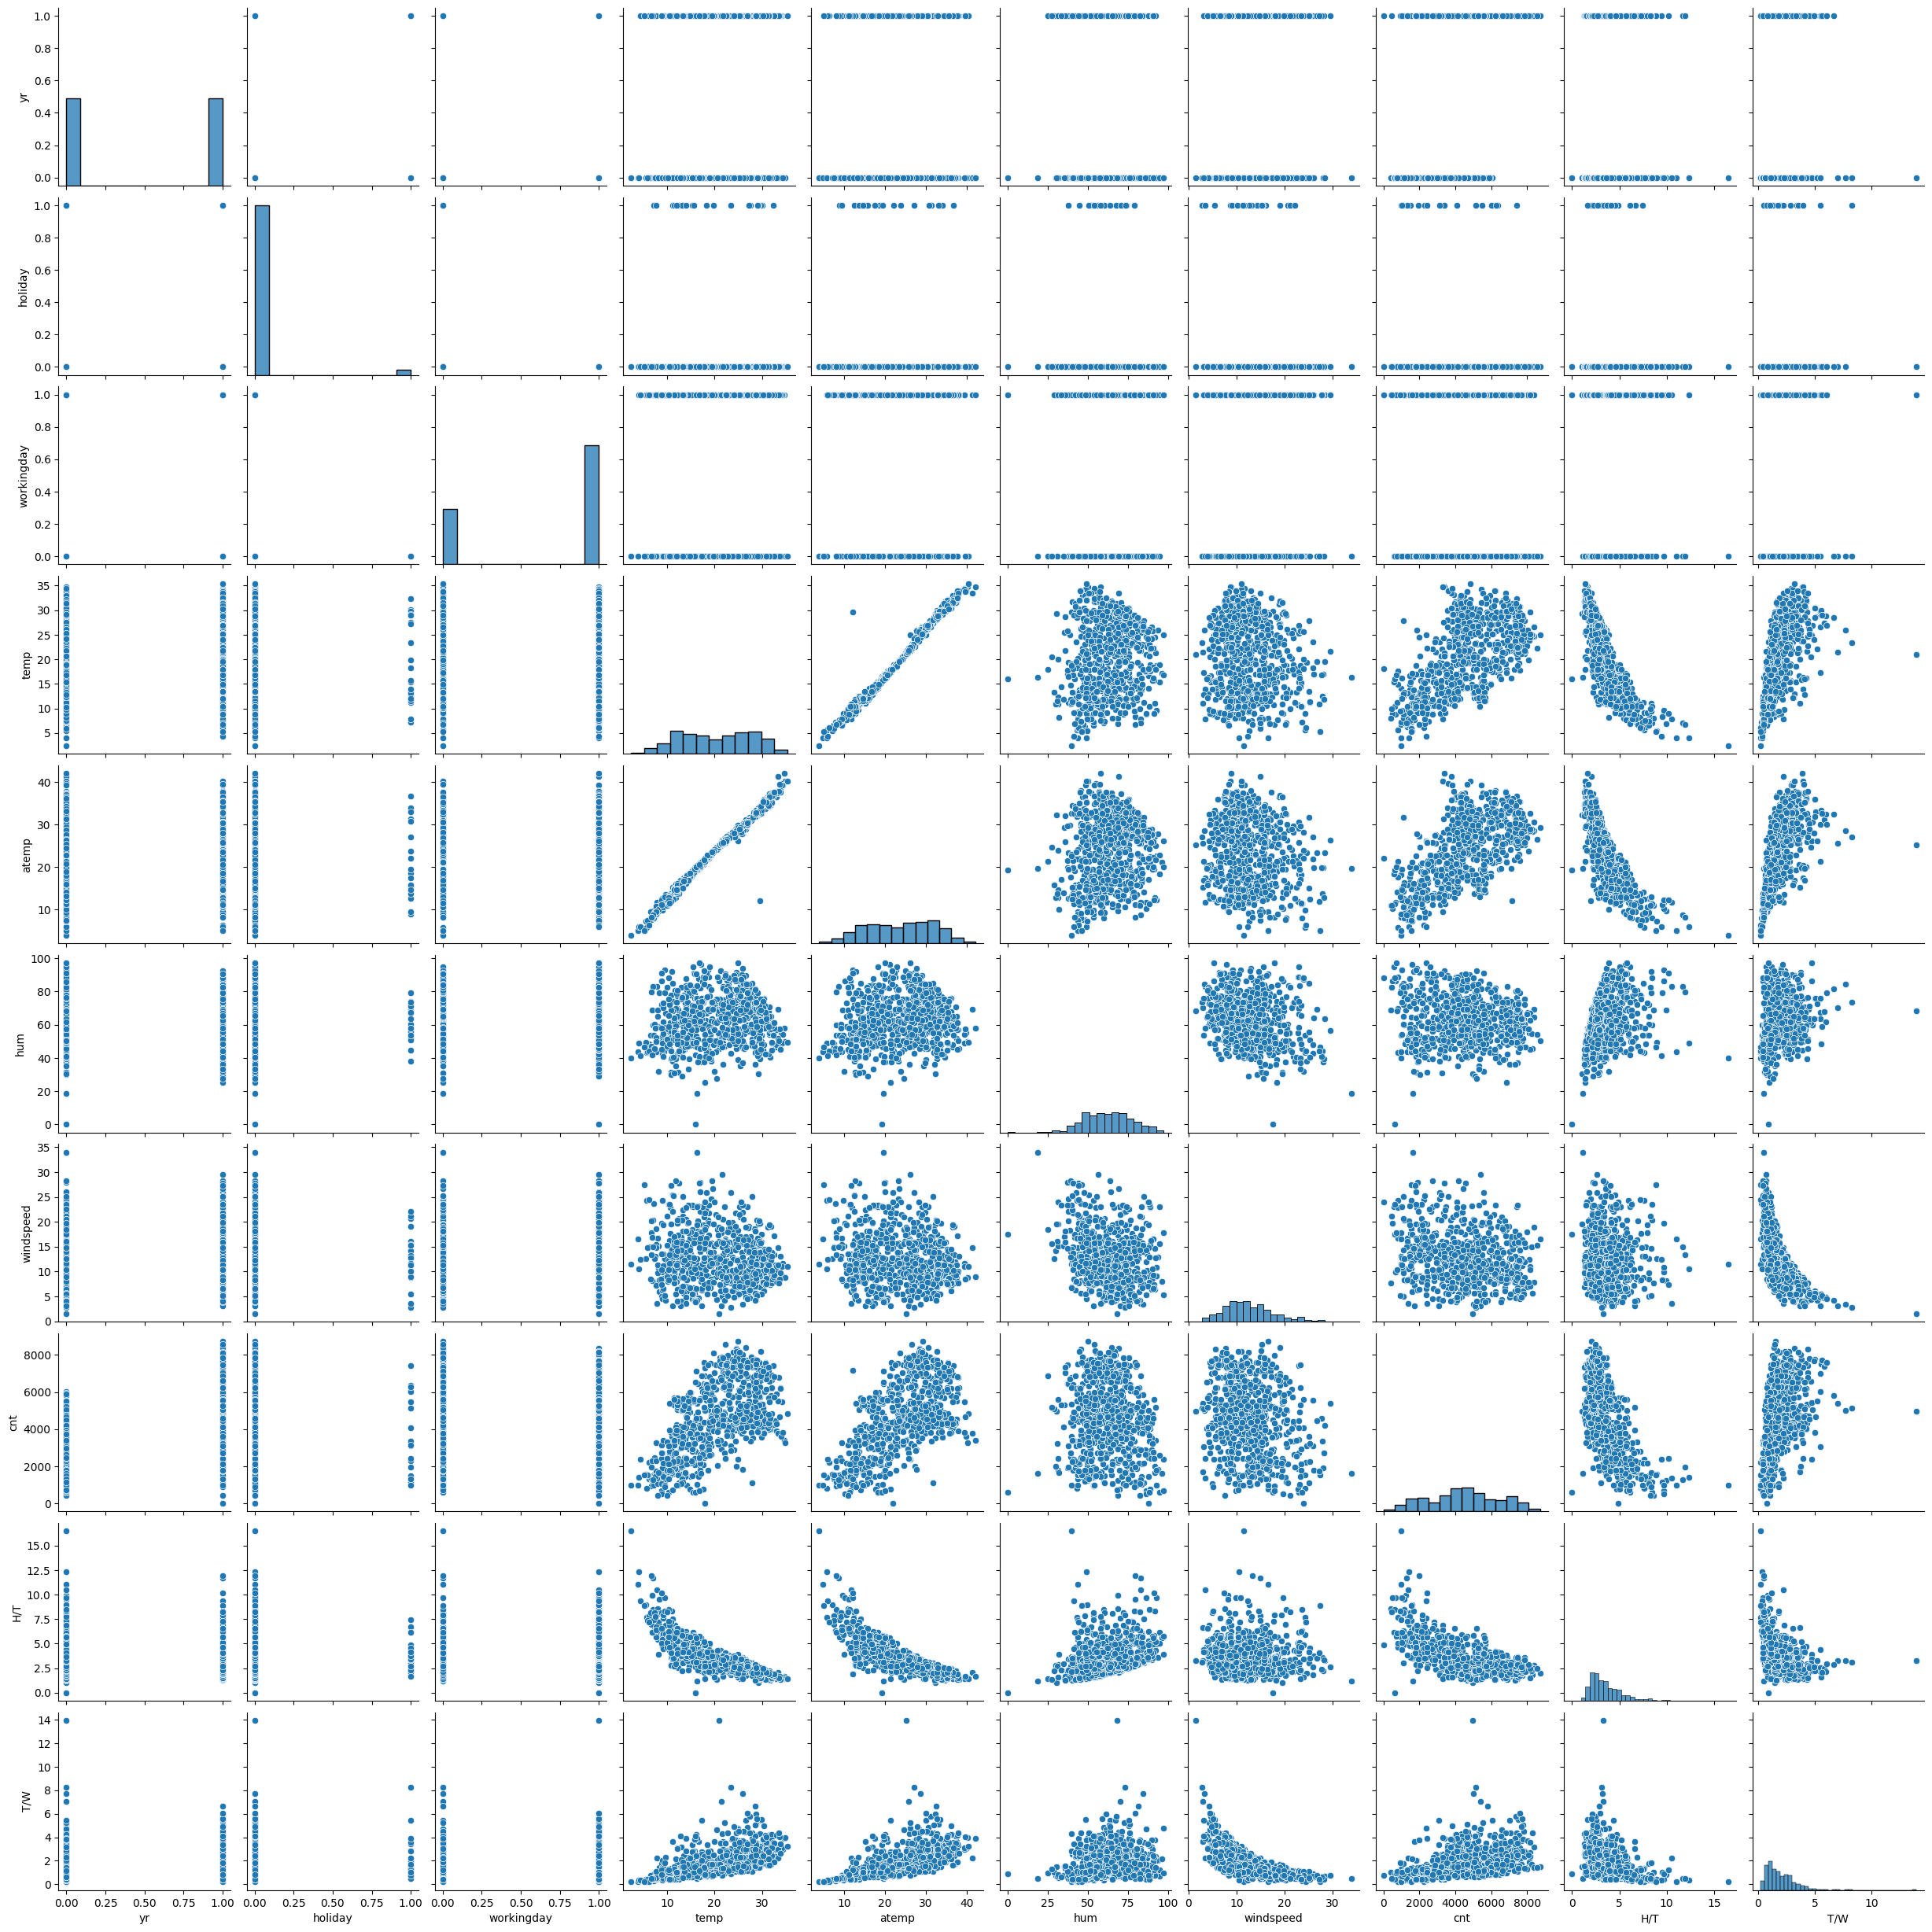

In [18]:
sns.pairplot(BoomBikes)
plt.show()

## Univariate Analysis

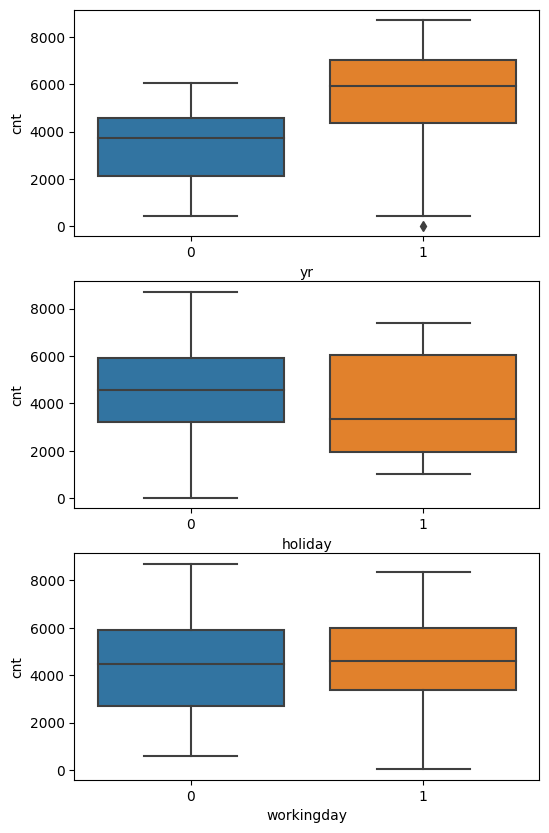

In [19]:
plt.figure(figsize=(6, 10))
plt.subplot(3,1,1)
sns.boxplot(x = bool_var[0], y = 'cnt', data = BoomBikes)
plt.subplot(3,1,2)
sns.boxplot(x = bool_var[1], y = 'cnt', data = BoomBikes)
plt.subplot(3,1,3)
sns.boxplot(x = bool_var[2], y = 'cnt', data = BoomBikes)


plt.show()

In [20]:
print(cat_var)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


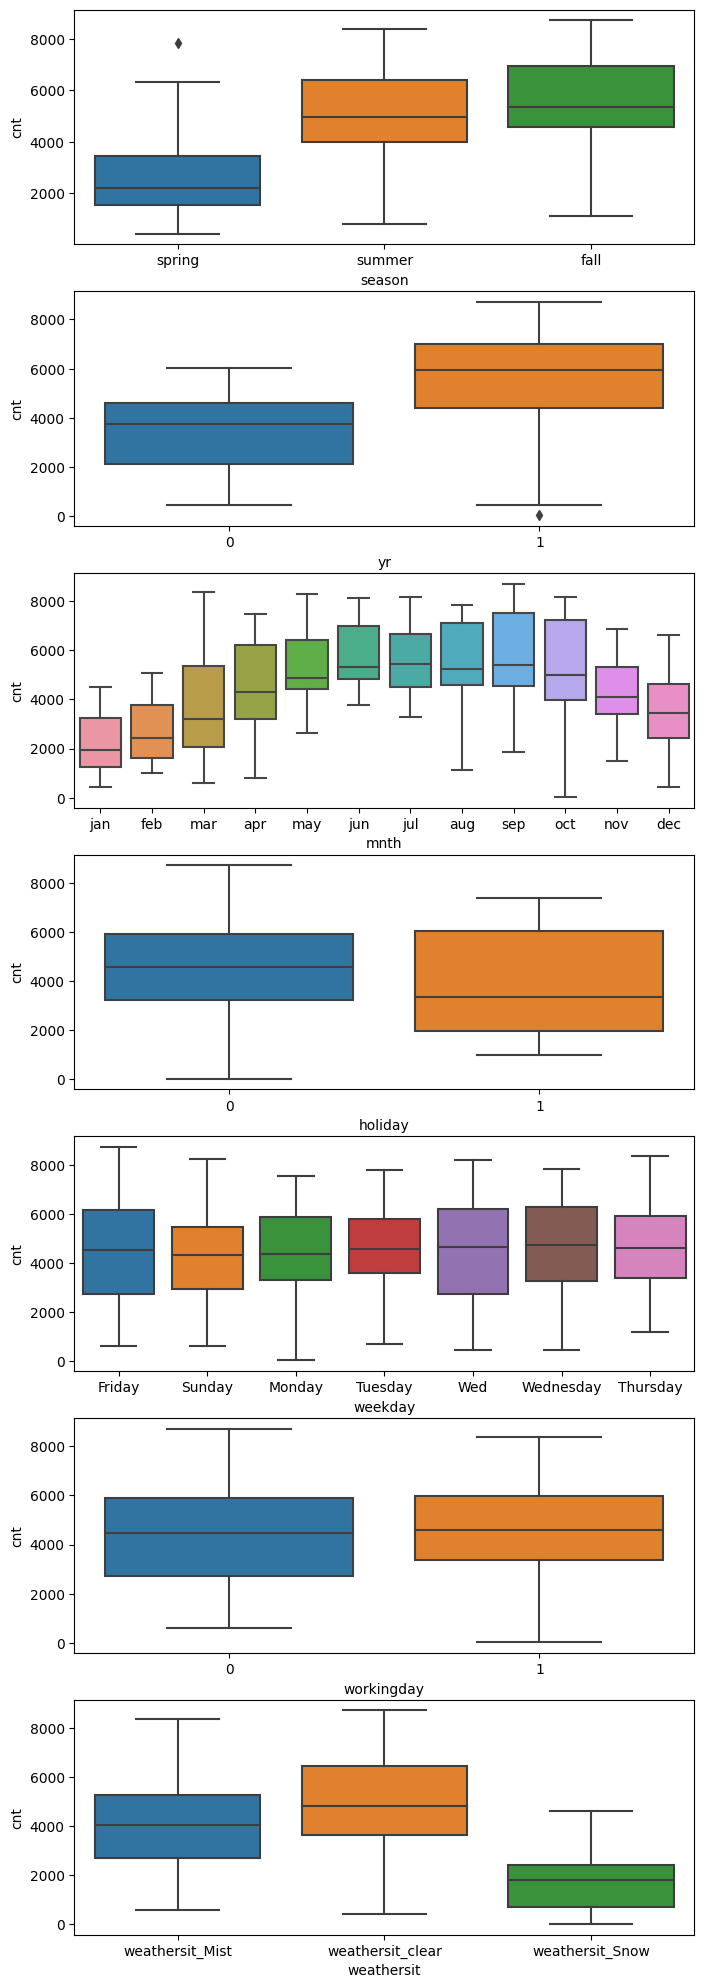

In [21]:
plt.figure(figsize=(8, 25))
plt.subplot(7,1,1)
sns.boxplot(x = cat_var[0], y = 'cnt', data = BoomBikes)
plt.subplot(7,1,2)
sns.boxplot(x = cat_var[1], y = 'cnt', data = BoomBikes)
plt.subplot(7,1,3)
sns.boxplot(x = cat_var[2], y = 'cnt', data = BoomBikes)
plt.subplot(7,1,4)
sns.boxplot(x = cat_var[3], y = 'cnt', data = BoomBikes)
plt.subplot(7,1,5)
sns.boxplot(x = cat_var[4], y = 'cnt', data = BoomBikes)
plt.subplot(7,1,6)
sns.boxplot(x = cat_var[5], y = 'cnt', data = BoomBikes)
plt.subplot(7,1,7)
sns.boxplot(x = cat_var[6], y = 'cnt', data = BoomBikes)

plt.show()

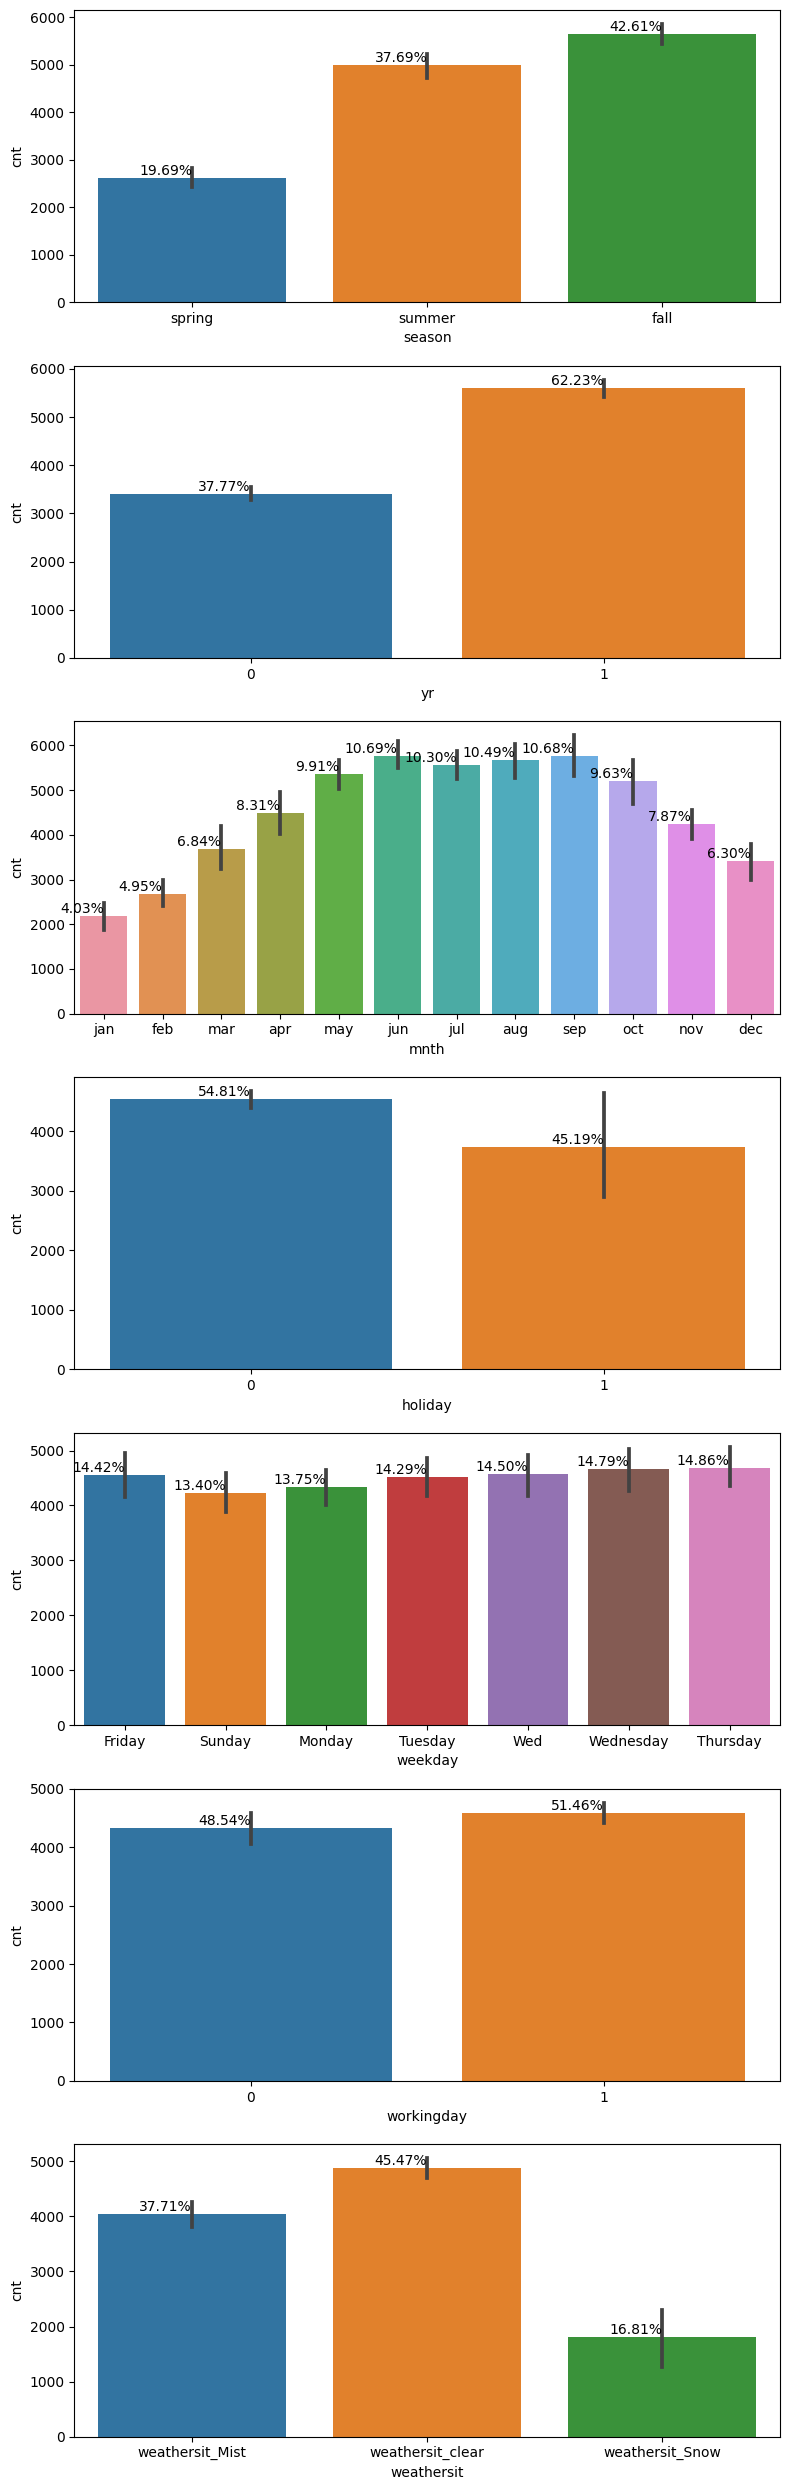

In [22]:
fig, axes = plt.subplots(7, 1, figsize=(8, 25))

# Loop through each categorical variable and create a bar plot
for i, cat_ in enumerate(cat_var):
    sns.barplot(x=cat_, y='cnt', data=BoomBikes, ax=axes[i])
    total = 0
    for p in axes[i].patches:
      total = total+ p.get_height()
    #print(total)
    for p in axes[i].patches:
        #print(p.get_height())
        percentage = '{:.2f}%'.format(100*p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[i].annotate(percentage, (x, y), ha='right', va='bottom')

# Adjust spacing between subplots
plt.tight_layout()

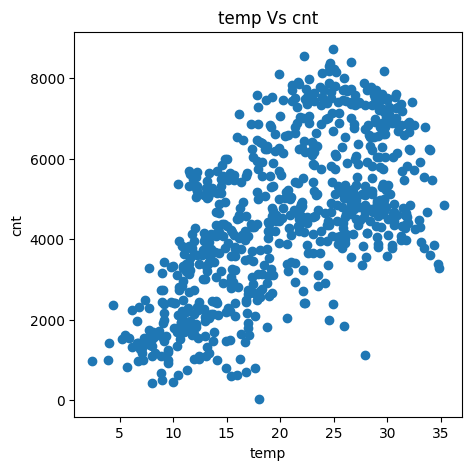

In [23]:
plt.figure(figsize=[5,5])
plt.scatter(BoomBikes.temp, BoomBikes.cnt)
plt.xlabel("temp")
plt.ylabel("cnt")
plt.title("temp Vs cnt")
plt.show()

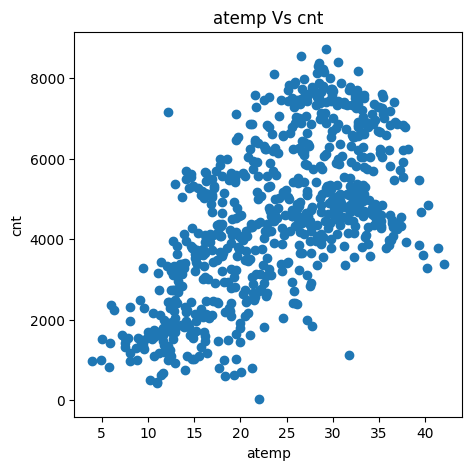

In [24]:
plt.figure(figsize=[5,5])
plt.scatter(BoomBikes.atemp, BoomBikes.cnt)
plt.xlabel("atemp")
plt.ylabel("cnt")
plt.title("atemp Vs cnt")
plt.show()

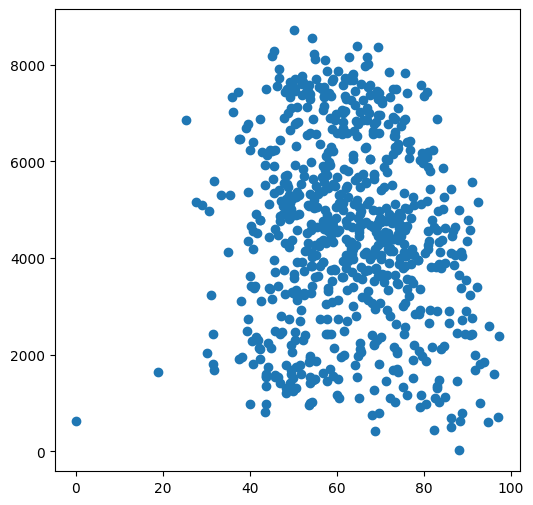

In [25]:
plt.figure(figsize=[6,6])
plt.scatter(BoomBikes.hum, BoomBikes.cnt)
plt.show()

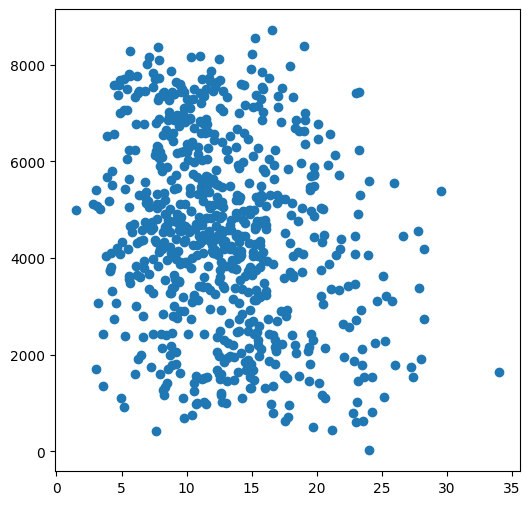

In [26]:
plt.figure(figsize=[6,6])
plt.scatter(BoomBikes.windspeed, BoomBikes.cnt)
plt.show()

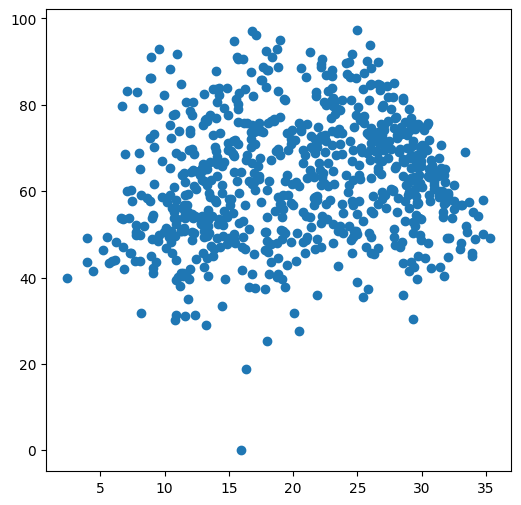

In [27]:
plt.figure(figsize=[6,6])
plt.scatter(BoomBikes.temp, BoomBikes.hum)
plt.show()

In [28]:
cat_var

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

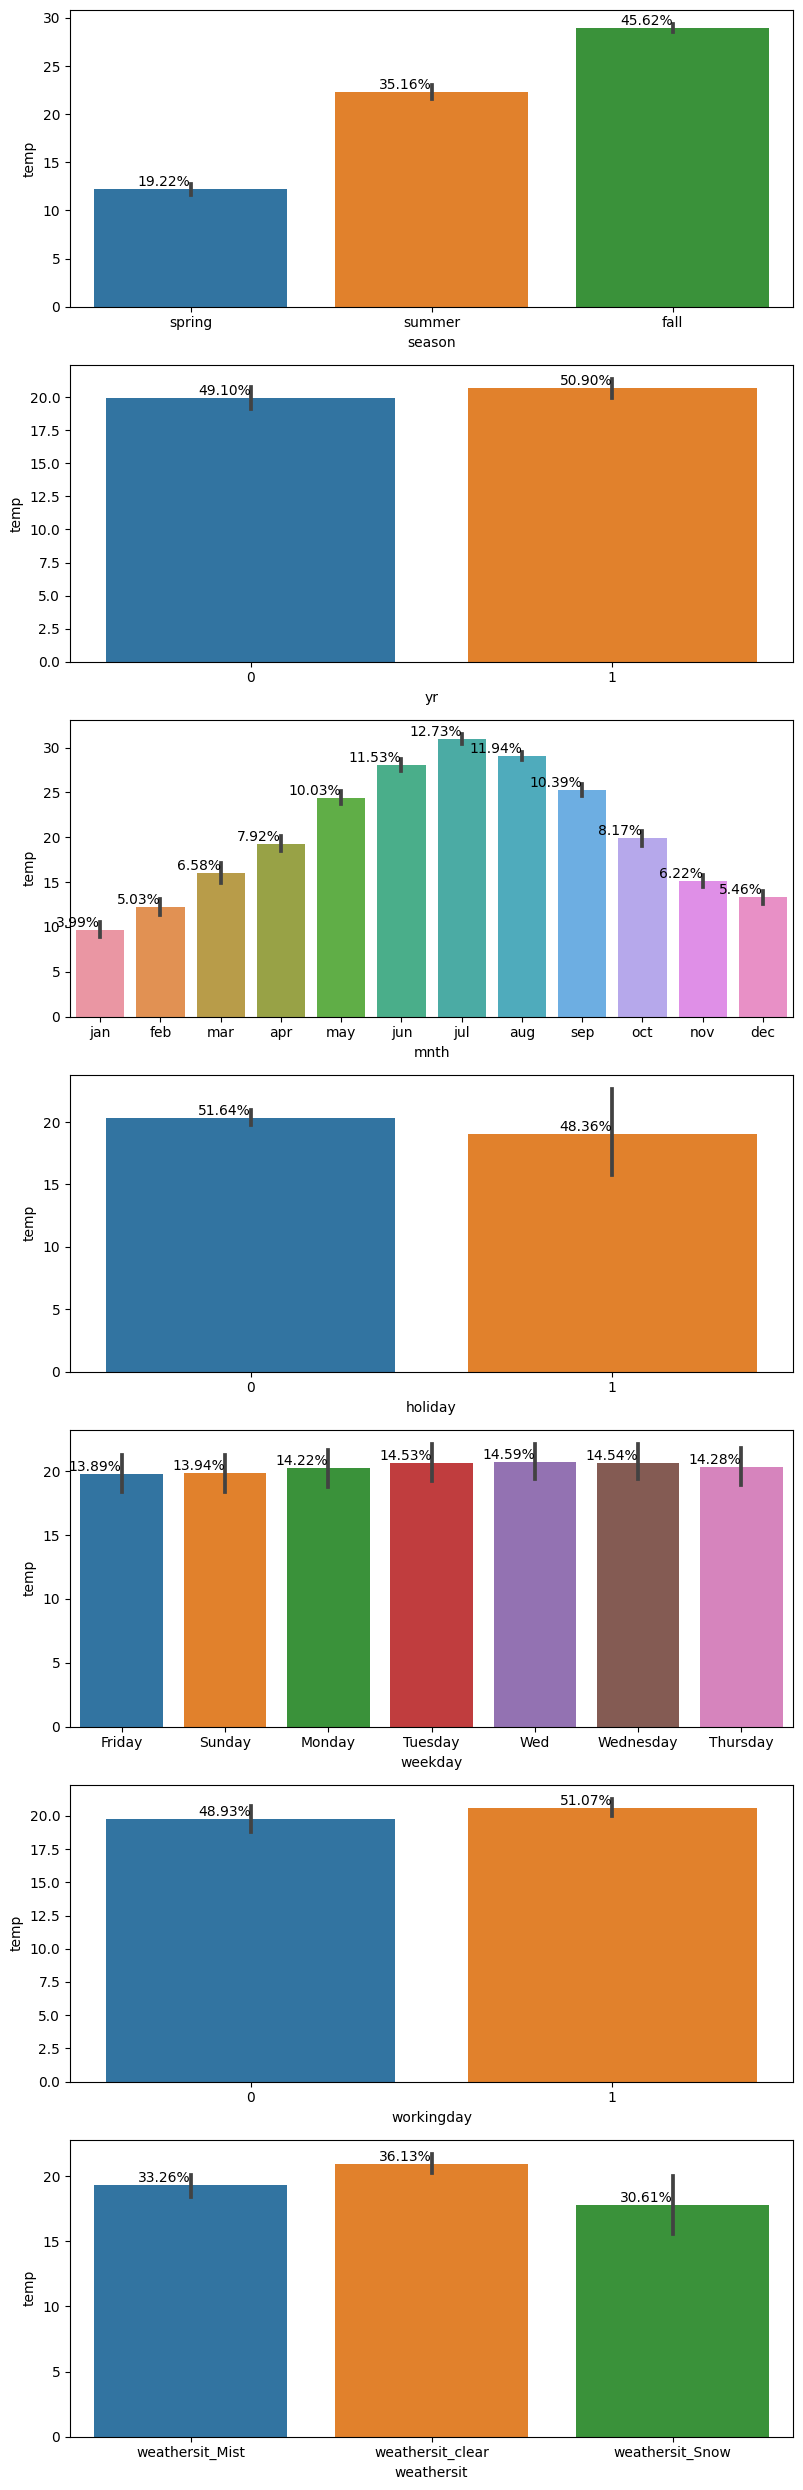

In [29]:
fig, axes = plt.subplots(7, 1, figsize=(8, 25))

# Loop through each categorical variable and create a bar plot
for i, cat_ in enumerate(cat_var):
    sns.barplot(x=cat_, y='temp', data=BoomBikes, ax=axes[i])
    total = 0
    for p in axes[i].patches:
      total = total+ p.get_height()
    #print(total)
    for p in axes[i].patches:
        #print(p.get_height())
        percentage = '{:.2f}%'.format(100*p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[i].annotate(percentage, (x, y), ha='right', va='bottom')

# Adjust spacing between subplots
plt.tight_layout()

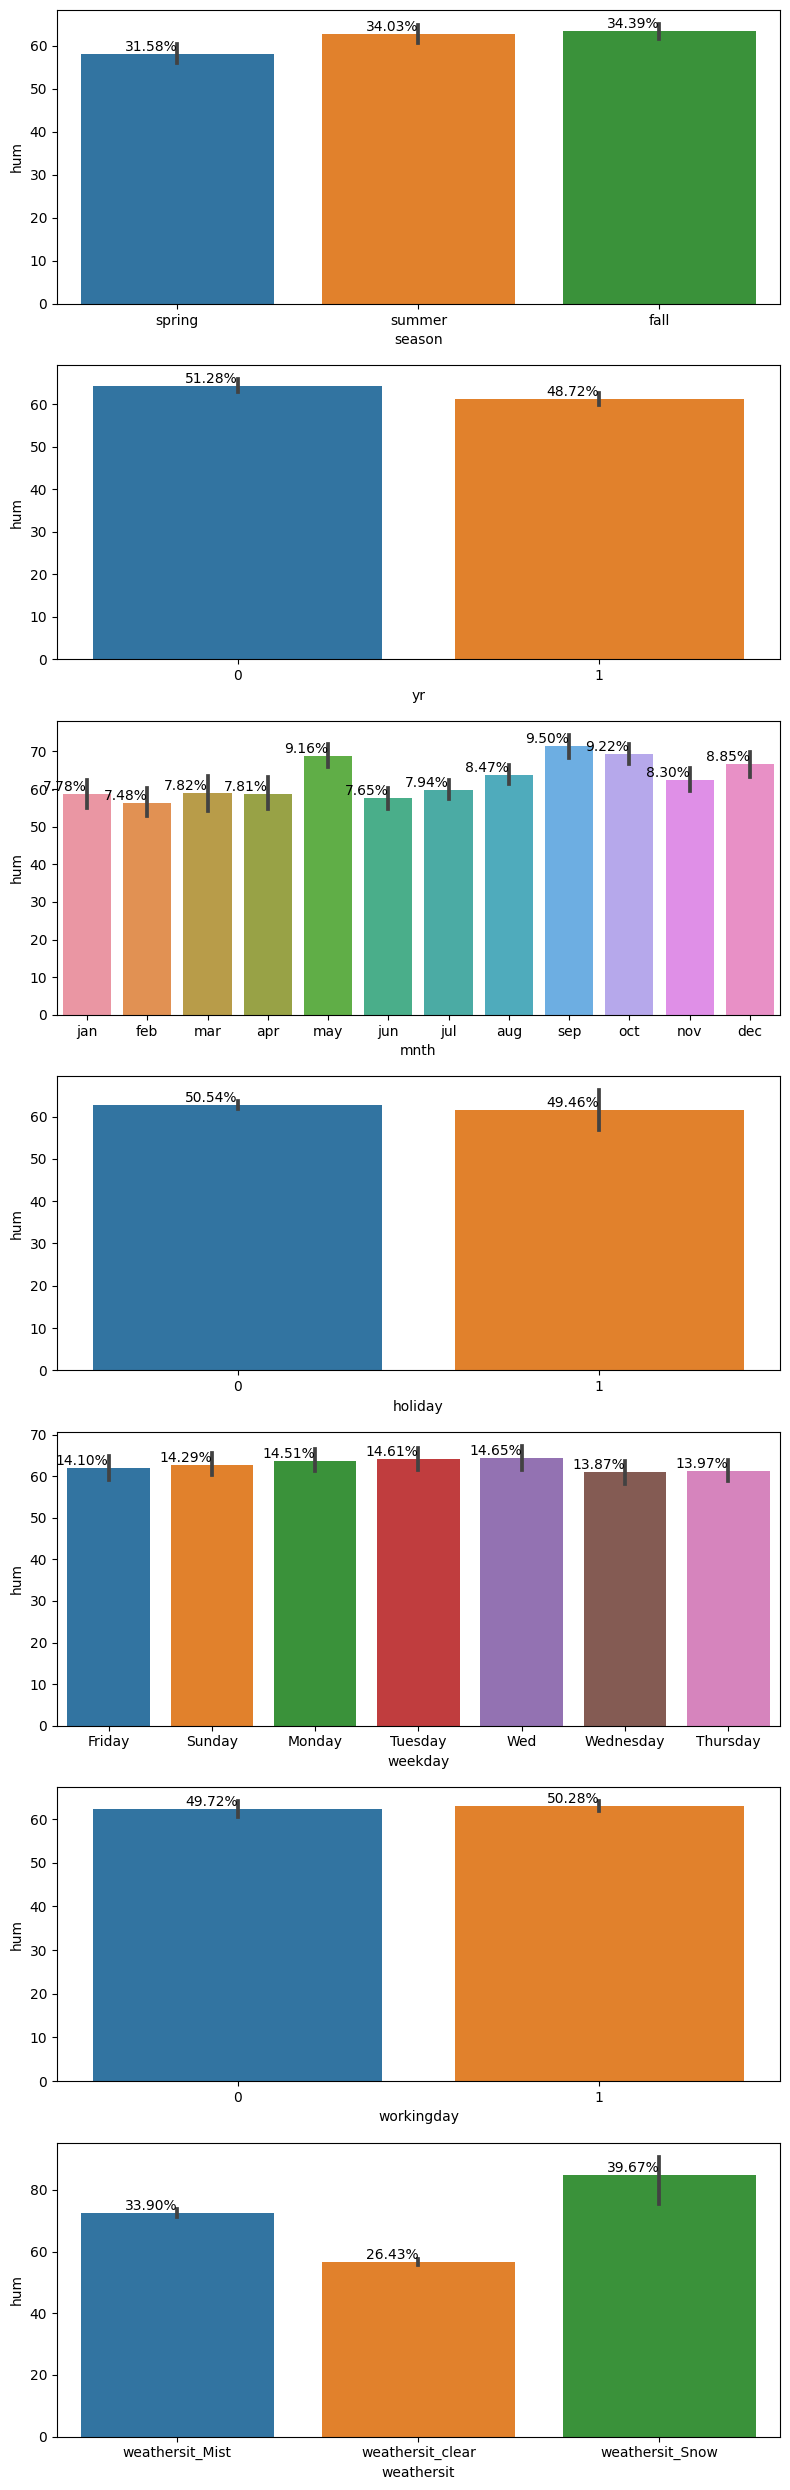

In [30]:
fig, axes = plt.subplots(7, 1, figsize=(8, 25))

# Loop through each categorical variable and create a bar plot
for i, cat_ in enumerate(cat_var):
    sns.barplot(x=cat_, y='hum', data=BoomBikes, ax=axes[i])
    total = 0
    for p in axes[i].patches:
      total = total+ p.get_height()
    #print(total)
    for p in axes[i].patches:
        #print(p.get_height())
        percentage = '{:.2f}%'.format(100*p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[i].annotate(percentage, (x, y), ha='right', va='bottom')

# Adjust spacing between subplots
plt.tight_layout()

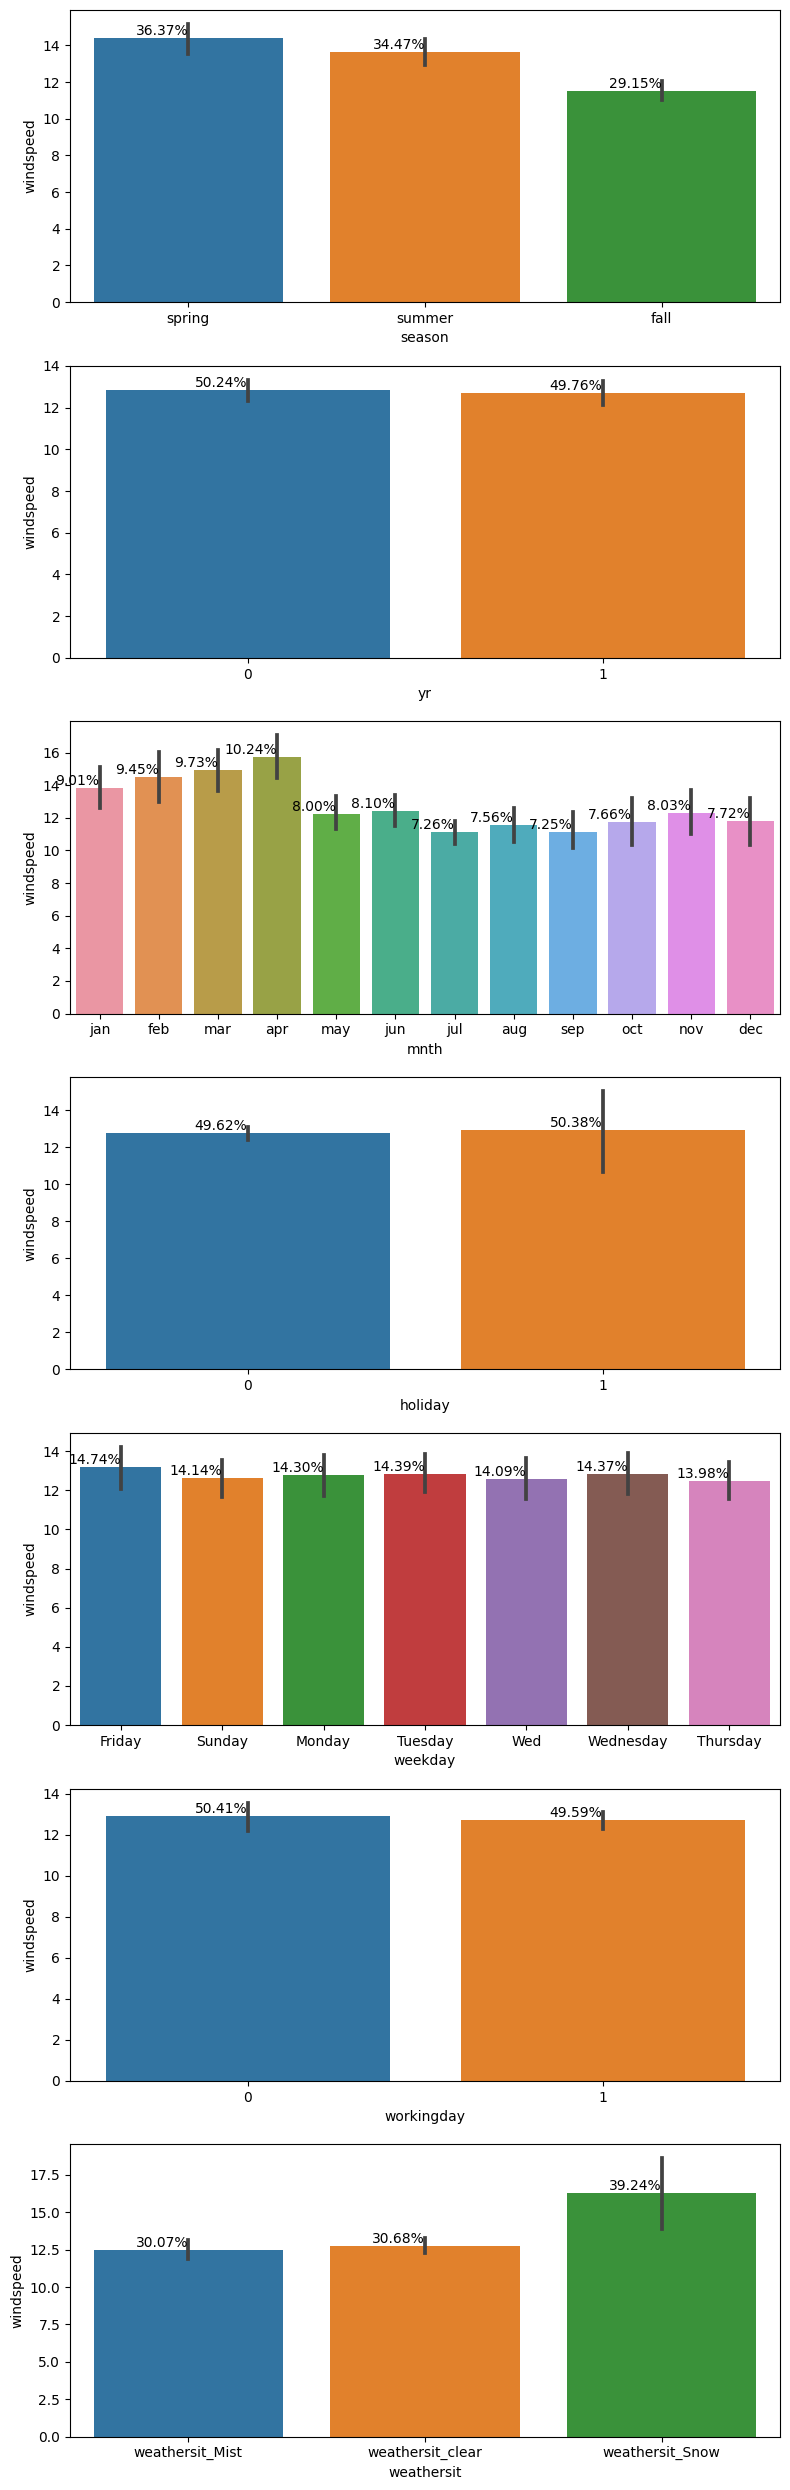

In [31]:
fig, axes = plt.subplots(7, 1, figsize=(8, 25))

# Loop through each categorical variable and create a bar plot
for i, cat_ in enumerate(cat_var):
    sns.barplot(x=cat_, y='windspeed', data=BoomBikes, ax=axes[i])
    total = 0
    for p in axes[i].patches:
      total = total+ p.get_height()
    #print(total)
    for p in axes[i].patches:
        #print(p.get_height())
        percentage = '{:.2f}%'.format(100*p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[i].annotate(percentage, (x, y), ha='right', va='bottom')

# Adjust spacing between subplots
plt.tight_layout()

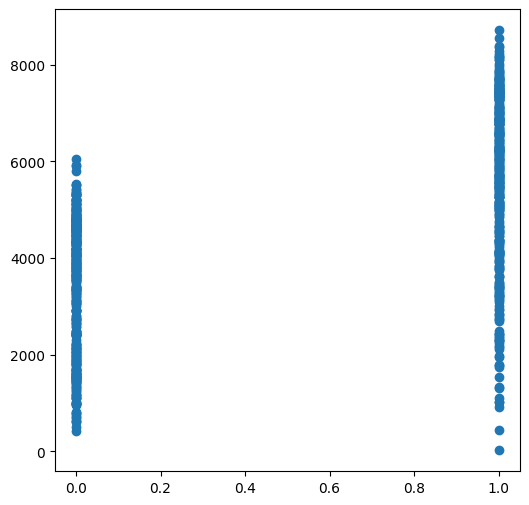

In [32]:
plt.figure(figsize=[6,6])
plt.scatter(BoomBikes.yr, BoomBikes.cnt)
plt.show()

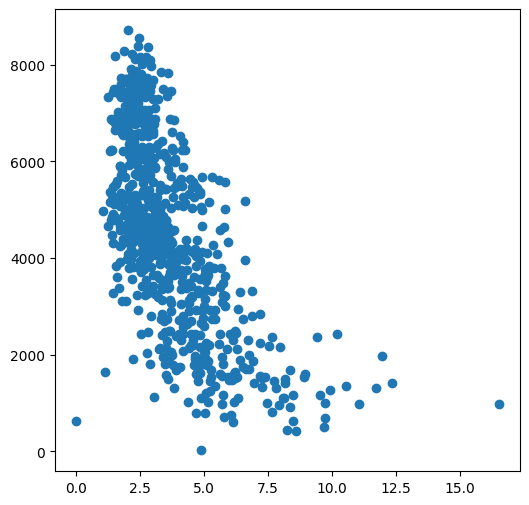

In [33]:
plt.figure(figsize=[6,6])
plt.scatter(BoomBikes['H/T'], BoomBikes.cnt)
plt.show()

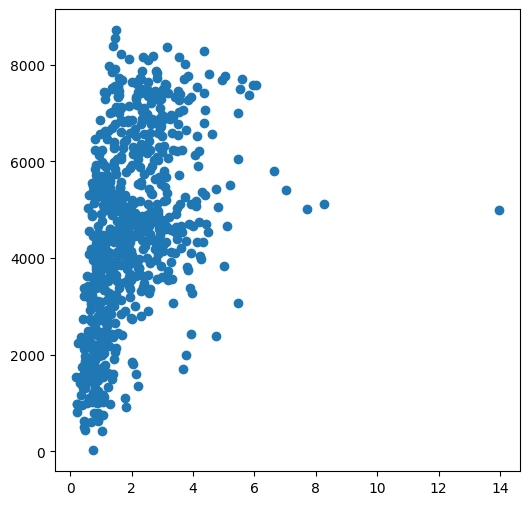

In [34]:
plt.figure(figsize=[6,6])
plt.scatter(BoomBikes['T/W'], BoomBikes.cnt)
plt.show()

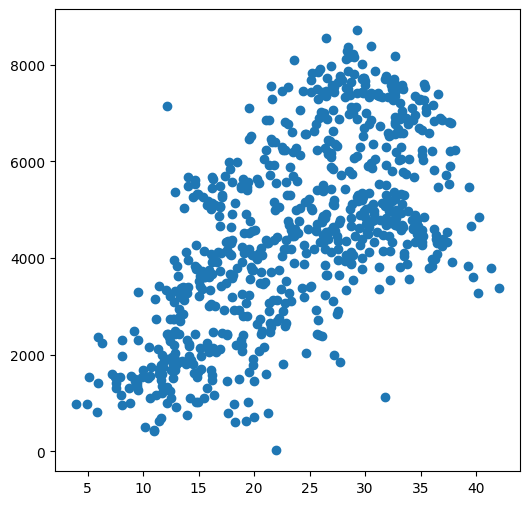

In [35]:
plt.figure(figsize=[6,6])
plt.scatter(BoomBikes.atemp, BoomBikes.cnt)
plt.show()

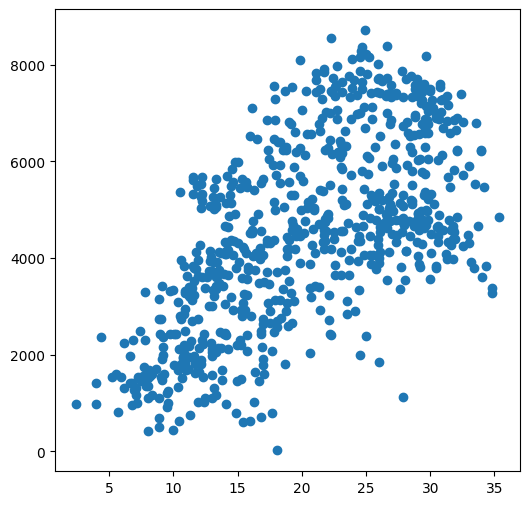

In [36]:
plt.figure(figsize=[6,6])
plt.scatter(BoomBikes.temp, BoomBikes.cnt)
plt.show()

## Bivariate Analysis

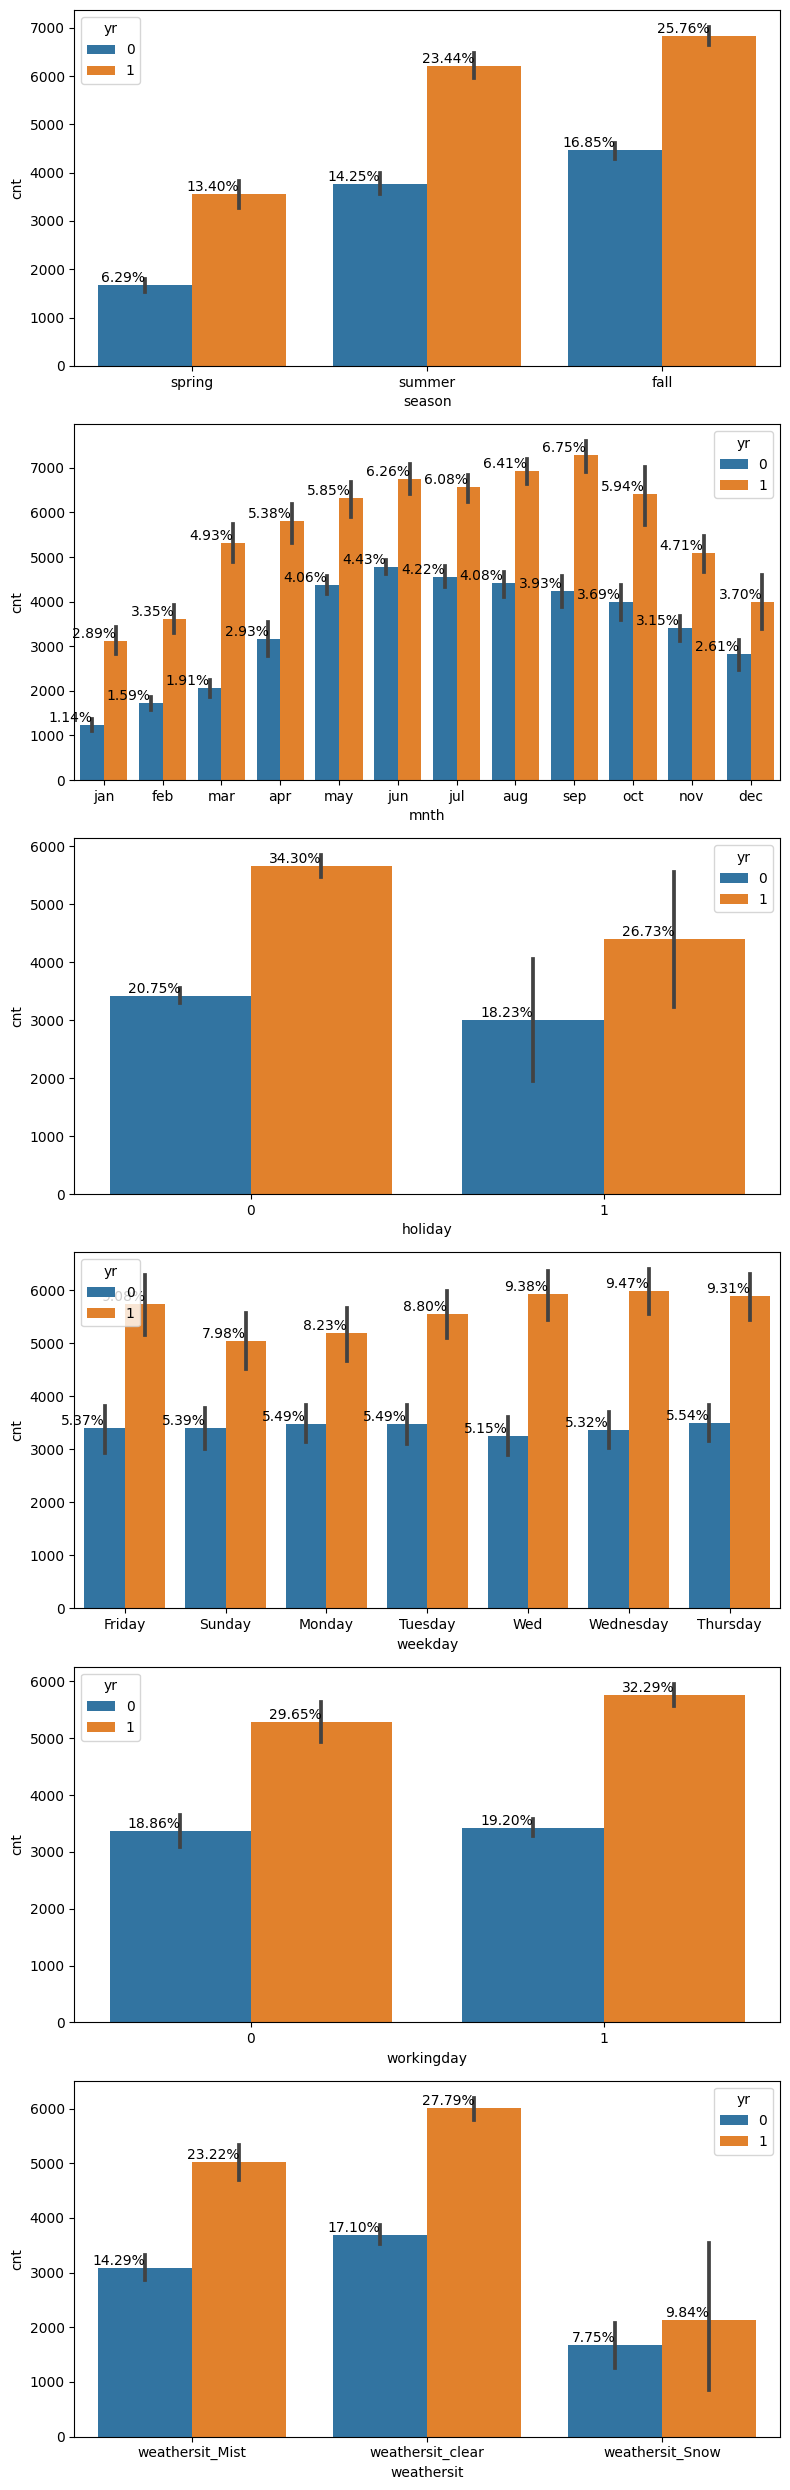

In [37]:
fig, axes = plt.subplots(6, 1, figsize=(8, 25))
non_yr_cat = ['season',  'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Loop through each categorical variable and create a bar plot
for i, cat_ in enumerate(non_yr_cat):
    sns.barplot(x=cat_, y='cnt',hue = 'yr', data=BoomBikes, ax=axes[i])
    total = 0
    for p in axes[i].patches:
      total = total+ p.get_height()
    #print(total)
    for p in axes[i].patches:
        #print(p.get_height())
        percentage = '{:.2f}%'.format(100*p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[i].annotate(percentage, (x, y), ha='right', va='bottom')

# Adjust spacing between subplots
plt.tight_layout()

## Multivariate Analysis

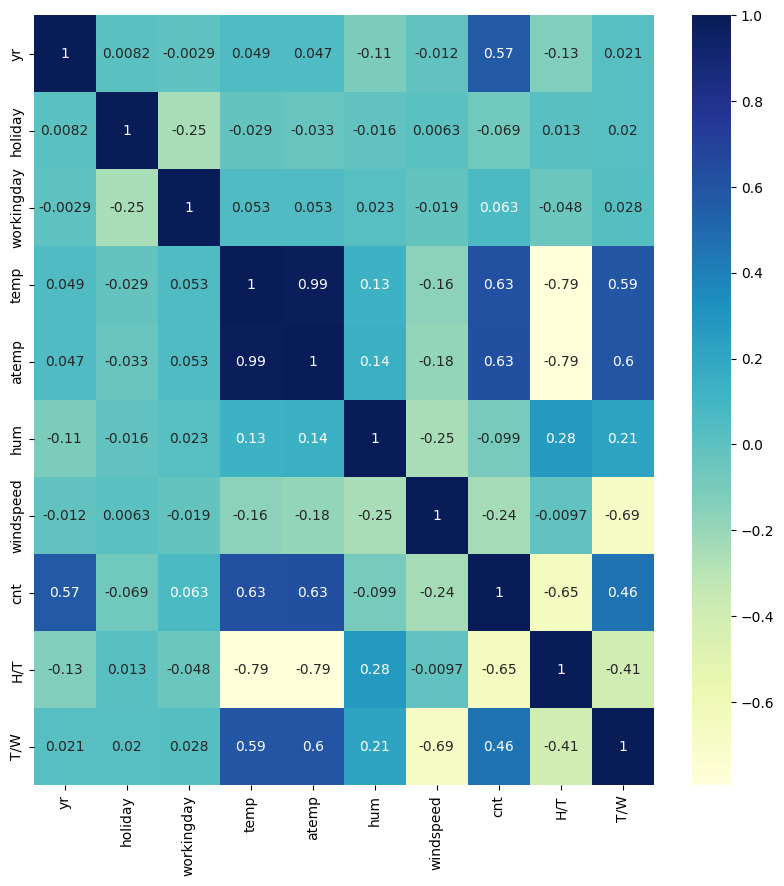

In [38]:
BoomBikes

plt.figure(figsize = (10 , 10))
sns.heatmap(BoomBikes.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Creating Dummy Variables

In [39]:
BoomBikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,H/T,T/W
0,spring,0,jan,0,Friday,0,weathersit_Mist,14.110847,18.18125,80.5833,10.749882,985,5.710734,1.312651
1,spring,0,jan,0,Sunday,0,weathersit_Mist,14.902598,17.68695,69.6087,16.652113,801,4.670910,0.894937
2,spring,0,jan,0,Monday,1,weathersit_clear,8.050924,9.47025,43.7273,16.636703,1349,5.431339,0.483925
3,spring,0,jan,0,Tuesday,1,weathersit_clear,8.200000,10.60610,59.0435,10.739832,1562,7.200427,0.763513
4,spring,0,jan,0,Wed,1,weathersit_clear,9.305237,11.46350,43.6957,12.522300,1600,4.695818,0.743093


In [40]:
##status = pd.get_dummies(BoomBikes['mnth'], drop_first = True)
#BoomBikes = pd.concat([BoomBikes, status], axis = 1)
#BoomBikes.drop(['mnth'], axis = 1, inplace = True)
#BoomBikes.head()

In [41]:
Variables_Requiring_Dummy_Vars


['weathersit', 'weekday', 'mnth', 'season']

In [42]:
for i, Var_ in enumerate(Variables_Requiring_Dummy_Vars):

  status = pd.get_dummies(BoomBikes[Var_], drop_first = True)
  BoomBikes = pd.concat([BoomBikes, status], axis = 1)
  BoomBikes.drop([Var_], axis = 1, inplace = True)

BoomBikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,H/T,T/W,...,jan,jul,jun,mar,may,nov,oct,sep,spring,summer
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,5.710734,1.312651,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,4.670910,0.894937,...,1,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,5.431339,0.483925,...,1,0,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,7.200427,0.763513,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4.695818,0.743093,...,1,0,0,0,0,0,0,0,1,0


## Spliting The Data Into Test Data and Train Data

In [43]:
num_Var

['cnt', 'temp', 'atemp', 'hum', 'windspeed', 'H/T', 'T/W']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
np.random.seed(0)
df_train, df_test = train_test_split(BoomBikes, train_size = 0.7, test_size = 0.3, random_state = 100)

## Scaling The Numerical Variables

We are going to use MinMaxScaler

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()
# We are using fit_transform
df_train[num_Var] = scaler.fit_transform(df_train[num_Var])

## Model Building

### We are going to build **Multi-Linear Regression Model**

In [48]:
y_train = df_train.pop('cnt')
X_train = df_train

In [49]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor          # Required for Calculating the VIF

In [50]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

Let's use RFE Approach to eliminate the features

In [51]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
rfe = RFE(estimator = LinearRegression() , n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))          # See the ranking of Variables

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('H/T', True, 1),
 ('T/W', False, 7),
 ('weathersit_Snow', True, 1),
 ('weathersit_clear', True, 1),
 ('Monday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 5),
 ('Tuesday', True, 1),
 ('Wed', False, 4),
 ('Wednesday', False, 2),
 ('aug', True, 1),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', True, 1),
 ('mar', False, 3),
 ('may', True, 1),
 ('nov', False, 8),
 ('oct', True, 1),
 ('sep', False, 10),
 ('spring', True, 1),
 ('summer', False, 11)]

In [53]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'H/T', 'weathersit_Snow',
       'weathersit_clear', 'Monday', 'Sunday', 'Tuesday', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'may', 'oct', 'spring'],
      dtype='object')

In [54]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [55]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)           #Add Constant

In [56]:
lm = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model

In [57]:
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)
print("\n\n\n")
# Print the extracted statistics
print("R-squared:", lm.rsquared)
print("Adjusted R-squared:", lm.rsquared_adj)
print("AIC:", lm.aic)
print("BIC:", lm.bic)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     134.3
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          5.26e-184
Time:                        07:08:10   Log-Likelihood:                 515.54
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     489   BIC:                            -900.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3440      0.041  

### Drop Feature

In [58]:
# As you can see 'may' has largest p value which is 0.520
# so lets drop the 'may' column
X_train_rfe.drop('may',axis = 1, inplace = True)

In [59]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model

In [60]:
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)
print("\n\n\n")
# Print the extracted statistics
print("R-squared:", lm.rsquared)
print("Adjusted R-squared:", lm.rsquared_adj)
print("AIC:", lm.aic)
print("BIC:", lm.bic)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     141.5
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          5.35e-185
Time:                        07:08:10   Log-Likelihood:                 515.33
No. Observations:                 510   AIC:                            -990.7
Df Residuals:                     490   BIC:                            -906.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3467      0.041  

### Drop Feature

In [61]:
#As we can see there is no significant change in R-squared and Adjusted R-squared
# which meanse the droped column was insignificant

In [62]:
# As you can see 'dec' has largest p value which is 0.487
# so lets drop the 'dec' column
X_train_rfe.drop('dec',axis = 1, inplace = True)

In [63]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model

In [64]:
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)
print("\n\n\n")
# Print the extracted statistics
print("R-squared:", lm.rsquared)
print("Adjusted R-squared:", lm.rsquared_adj)
print("AIC:", lm.aic)
print("BIC:", lm.bic)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     149.5
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          5.48e-186
Time:                        07:08:10   Log-Likelihood:                 515.08
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     491   BIC:                            -911.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3426      0.040  

### Drop Feature

In [65]:
#As we can see there is no significant change in R-squared and Adjusted R-squared
# which meanse the droped column was insignificant
# Also you can see 'feb' has largest p value which is 0.529
# so lets drop the 'feb' column
X_train_rfe.drop('feb',axis = 1, inplace = True)

In [66]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model

In [67]:
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)
print("\n\n\n")
# Print the extracted statistics
print("R-squared:", lm.rsquared)
print("Adjusted R-squared:", lm.rsquared_adj)
print("AIC:", lm.aic)
print("BIC:", lm.bic)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.5
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          5.22e-187
Time:                        07:08:10   Log-Likelihood:                 514.87
No. Observations:                 510   AIC:                            -993.7
Df Residuals:                     492   BIC:                            -917.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3426      0.040  

### Drop Feature

In [68]:
#As we can see there is no significant change in R-squared and Adjusted R-squared
# which meanse the droped column was insignificant
# Also you can see 'H/T' has largest p value which is 0.310
# so lets drop the 'H/T' column
X_train_rfe.drop('H/T',axis = 1, inplace = True)

In [69]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model

In [70]:
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)
print("\n\n\n")
# Print the extracted statistics
print("R-squared:", lm.rsquared)
print("Adjusted R-squared:", lm.rsquared_adj)
print("AIC:", lm.aic)
print("BIC:", lm.bic)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.3
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          6.62e-188
Time:                        07:08:11   Log-Likelihood:                 514.33
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     493   BIC:                            -922.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3207      0.034  

### Drop Feature

In [71]:
#As we can see there is no significant change in R-squared and Adjusted R-squared
# which meanse the droped column was insignificant
# Also you can see 'Tuesday' has largest p value which is 0.183
# so lets drop the 'Tuesday' column
X_train_rfe.drop('Tuesday',axis = 1, inplace = True)

In [72]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model

In [73]:
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)
print("\n\n\n")
# Print the extracted statistics
print("R-squared:", lm.rsquared)
print("Adjusted R-squared:", lm.rsquared_adj)
print("AIC:", lm.aic)
print("BIC:", lm.bic)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.1
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          1.17e-188
Time:                        07:08:11   Log-Likelihood:                 513.42
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     494   BIC:                            -927.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3193      0.034  

### Drop Feature

In [74]:
#As we can see there is no significant change in R-squared and Adjusted R-squared
# which meanse the droped column was insignificant
# Also you can see 'Monday' has largest p value which is 0.220
# so lets drop the 'Monday' column
X_train_rfe.drop('Monday',axis = 1, inplace = True)

In [75]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model

In [76]:
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)
print("\n\n\n")
# Print the extracted statistics
print("R-squared:", lm.rsquared)
print("Adjusted R-squared:", lm.rsquared_adj)
print("AIC:", lm.aic)
print("BIC:", lm.bic)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.6
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          1.76e-189
Time:                        07:08:11   Log-Likelihood:                 512.64
No. Observations:                 510   AIC:                            -995.3
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3179      0.034  

### Drop Feature

In [77]:
#As we can see there is no significant change in R-squared and Adjusted R-squared
# which meanse the droped column was insignificant
# We will drop the 'hum' column wich has second highest VIF which is 14.30
# if we drop the 'temp' column the R-squared and Adjusted R-squared drops significantly

X_train_rfe.drop('hum',axis = 1, inplace = True)

In [78]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model

In [79]:
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)
print("\n\n\n")
# Print the extracted statistics
print("R-squared:", lm.rsquared)
print("Adjusted R-squared:", lm.rsquared_adj)
print("AIC:", lm.aic)
print("BIC:", lm.bic)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.2
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          2.70e-187
Time:                        07:08:11   Log-Likelihood:                 504.67
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     496   BIC:                            -922.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2103      0.020  

### Drop Feature

In [80]:
#As we can see there is significant change in R-squared and Adjusted R-squared
# which meanse the droped column was significant one
# The 'temp' has VIF of 7.22 but if we drop 'temp' column the R-squared and Adjusted R-squared drops significantly
# Also As we have seen in EDA 'temp' is very much depend on 'mnth' column specially 'jun' , 'jul' , 'aug'

X_train_rfe.drop('jul',axis = 1, inplace = True)

In [81]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model

In [82]:
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)
print("\n\n\n")
# Print the extracted statistics
print("R-squared:", lm.rsquared)
print("Adjusted R-squared:", lm.rsquared_adj)
print("AIC:", lm.aic)
print("BIC:", lm.bic)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     201.8
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          2.90e-182
Time:                        07:08:11   Log-Likelihood:                 489.94
No. Observations:                 510   AIC:                            -953.9
Df Residuals:                     497   BIC:                            -898.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2508      0.020  

### Drop Feature

In [83]:
#As we can see there is significant change in R-squared and Adjusted R-squared
# which meanse the droped column was significant one
X_train_rfe.drop('jun',axis = 1, inplace = True)

In [84]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model

In [85]:
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)
print("\n\n\n")
# Print the extracted statistics
print("R-squared:", lm.rsquared)
print("Adjusted R-squared:", lm.rsquared_adj)
print("AIC:", lm.aic)
print("BIC:", lm.bic)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          1.92e-183
Time:                        07:08:11   Log-Likelihood:                 489.93
No. Observations:                 510   AIC:                            -955.9
Df Residuals:                     498   BIC:                            -905.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2512      0.019  

### Drop Feature

In [86]:
#As we can see there is significant change in R-squared and Adjusted R-squared
# which meanse the droped column was significant one
X_train_rfe.drop('aug',axis = 1, inplace = True)

In [87]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model

In [88]:
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)
print("\n\n\n")
# Print the extracted statistics
print("R-squared:", lm.rsquared)
print("Adjusted R-squared:", lm.rsquared_adj)
print("AIC:", lm.aic)
print("BIC:", lm.bic)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.7
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          1.82e-184
Time:                        07:08:11   Log-Likelihood:                 489.51
No. Observations:                 510   AIC:                            -957.0
Df Residuals:                     499   BIC:                            -910.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2536      0.019  

In [89]:
# As we can see the p values for remaining features is less than 0.05 and VIF value is also less than 5

**R-squared: 0.8294337461008385**

**Adjusted R-squared: 0.8260155847000538**

**AIC: -957.0223301618121**

**BIC: -910.44381217891**

In [90]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Residual Analysis**

In [91]:
y_train_pred = lm.predict(X_train_rfe_sm)

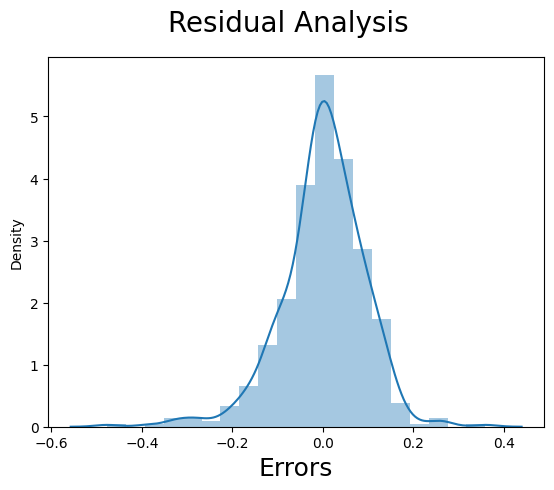

In [92]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Residual Analysis', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

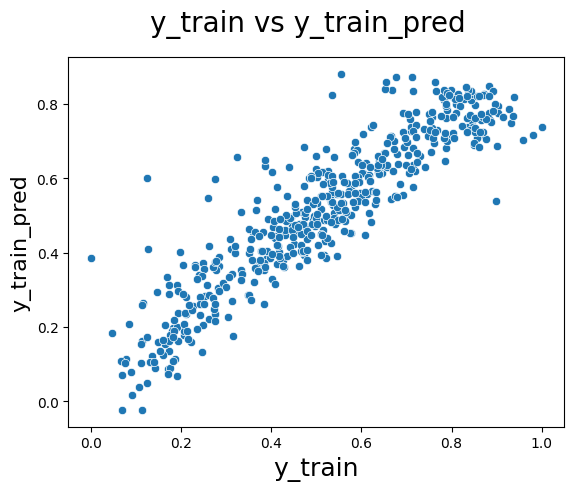

In [93]:
# Plot the histogram of the error terms
fig = plt.figure()
#plt.scatter(y_test,y_pred)
sns.scatterplot(x=y_train, y=y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize=20)              # Plot heading
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)                          # Y-label
plt.show()

# **Making Predictions**

In [94]:
num_Var

['cnt', 'temp', 'atemp', 'hum', 'windspeed', 'H/T', 'T/W']

In [95]:
df_test[num_Var] = scaler.transform(df_test[num_Var])
# Note:- We are using .transform

In [96]:
y_test = df_test.pop('cnt')
X_test = df_test

In [97]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [98]:
# Making predictions
y_pred = lm.predict(X_test_new)

## **Testing Predictions**

Text(0, 0.5, 'y_pred')

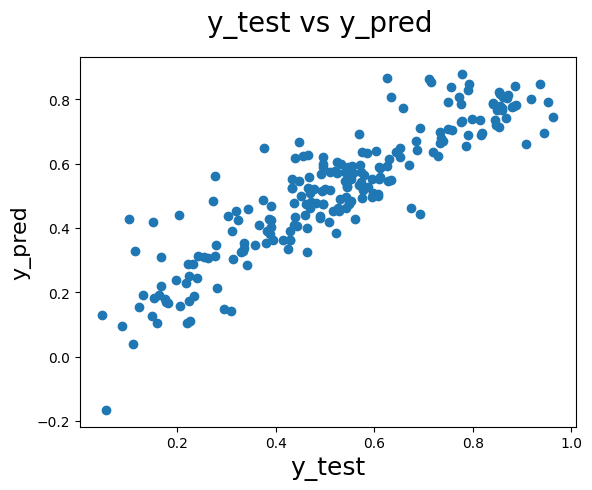

In [99]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

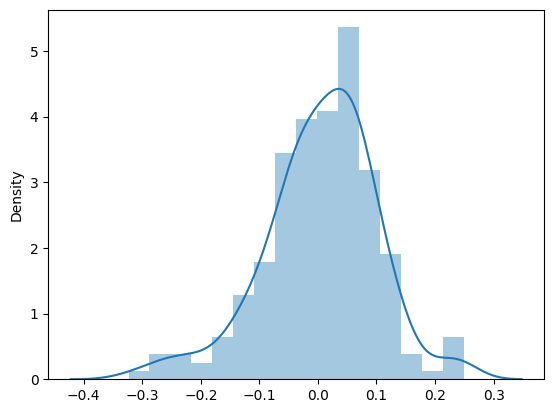

In [100]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred))#, bins = 8)
plt.show()

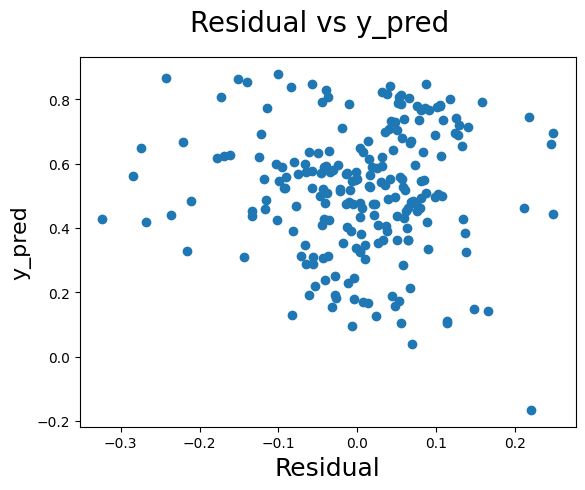

In [101]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter((y_test - y_pred),y_pred)
fig.suptitle('Residual vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('Residual', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()